# Healthcare Sectors - Market Analysis

In [1]:
import yfinance as yf
import pandas as pd
import time

# List of top 33 healthcare company ticker symbols
companies = [
    'JNJ', 'PFE', 'RHHBY', 'NVS', 'MRK', 'UNH', 'ABBV', 'BMY', 'LLY', 'MDT',
    'GSK', 'AZN', 'AMGN', 'SNY', 'DHR', 'CI', 'ISRG', 'SYK', 'CVS', 'BDX',
    'REGN', 'VRTX', 'ILMN', 'ZTS', 'BIIB', 'HUM', 'IQV', 'MCK',
    'GEHC',   # GE Healthcare
    'SMMNY',  # Siemens Healthineers
    'PHG'     # Philips
]

# Define the metrics we want to collect
metrics = [
    'shortName', 'marketCap', 'trailingPE', 'forwardPE', 'priceToBook', 'dividendYield',
    'revenue', 'grossProfits', 'freeCashflow', 'fullTimeEmployees', 'industry',
    'longBusinessSummary', 'operatingMargins'
]

# Create an empty DataFrame to store the financial data
financial_data = pd.DataFrame(columns=['Company', 'last_traded_price', 'sales_margin_%'] + metrics)

# Pull financial data for each company and add it to the DataFrame
for ticker in companies:
    try:
        company = yf.Ticker(ticker)
        info = company.info
        hist = company.history(period='1d')  # Get last traded price

        # Create a row of data for each company, handling missing 'shortName' keys
        row = {metric: info.get(metric, 'N/A') for metric in metrics}
        row['Company'] = info.get('shortName', ticker)  # Use the ticker symbol if 'shortName' is missing

        # Get last traded price (closing price)
        row['last_traded_price'] = hist['Close'].values[0] if not hist.empty else 'N/A'

        # Calculate sales margin % (operating margin * 100)
        row['sales_margin_%'] = f"{info.get('operatingMargins', 0) * 100:.2f}%" if info.get('operatingMargins') else 'N/A'

        # Append the row to the DataFrame using pd.concat, ensuring the row is not empty
        if any(value != 'N/A' for value in row.values()):  # Check if at least one value is not 'N/A'
            financial_data = pd.concat([financial_data, pd.DataFrame([row])], ignore_index=True)

        # Delay to avoid rate-limiting issues
        time.sleep(2)  # 2 seconds delay between requests

    except Exception as e:
        print(f"Error retrieving data for {ticker}: {e}")

# Convert marketCap to numeric values and handle missing data
financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'], errors='coerce')

# Sort the DataFrame by marketCap in descending order
#financial_data = financial_data.sort_values(by='marketCap', ascending=False)
financial_data = financial_data.sort_values(by='Company', ascending=True)

# Format marketCap as currency (e.g., $100B)
financial_data['marketCap'] = financial_data['marketCap'].apply(lambda x: f"${x:,.0f}" if pd.notna(x) else 'N/A')

# Display the sorted and formatted DataFrame
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame
display(financial_data)

# Optional: Save the DataFrame to a CSV file
#financial_data.to_csv('top_33_healthcare_companies_sorted_financials.csv', index=False)


<ipython-input-1-3ffd07711a76>:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  financial_data = pd.concat([financial_data, pd.DataFrame([row])], ignore_index=True)


,Company,last_traded_price,sales_margin_%,shortName,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,revenue,grossProfits,freeCashflow,fullTimeEmployees,industry,longBusinessSummary,operatingMargins
6,AbbVie Inc.,209.520004,36.66%,AbbVie Inc.,"$370,636,685,312",88.03361,17.272877,111.210200,3.2,N/A,39644999680,19977500672,55000,Drug Manufacturers - General,"AbbVie Inc., a research-based biopharmaceutica...",0.36657
12,Amgen Inc.,311.549988,51.80%,Amgen Inc.,"$167,366,213,632",41.264896,15.072568,28.462450,3.1,N/A,22965999616,13725875200,28000,Drug Manufacturers - General,"Amgen Inc. discovers, develops, manufactures, ...",0.51805
11,Astrazeneca PLC,73.500000,22.72%,Astrazeneca PLC,"$227,874,258,944",32.666668,13.387979,2.794252,2.1,N/A,44435001344,8460749824,94300,Drug Manufacturers - General,"AstraZeneca PLC, a biopharmaceutical company, ...",0.22718
19,"Becton, Dickinson and Company",229.059998,15.27%,"Becton, Dickinson and Company","$65,771,143,168",38.56229,14.561984,2.609448,1.75,N/A,9550999552,3359000064,70000,Medical Instruments & Supplies,"Becton, Dickinson and Company develops, manufa...",0.15267
24,Biogen Inc.,136.839996,21.51%,Biogen Inc.,"$20,029,956,096",12.239713,8.213685,1.193546,N/A,N/A,7365499904,3266925056,7605,Drug Manufacturers - General,"Biogen Inc. discovers, develops, manufactures,...",0.21506
7,Bristol-Myers Squibb Company,60.990002,22.66%,Bristol-Myers Squibb Company,"$124,100,009,984",N/A,8.675675,7.575457,4.13,N/A,36351000576,16890250240,34100,Drug Manufacturers - General,"Bristol-Myers Squibb Company discovers, develo...",0.22662
18,CVS Health Corporation,67.750000,1.96%,CVS Health Corporation,"$85,419,196,416",18.51093,10.455247,1.129769,3.96,N/A,49248002048,6909125120,219000,Healthcare Plans,CVS Health Corporation provides health solutio...,0.01957
14,Danaher Corporation,205.000000,22.47%,Danaher Corporation,"$146,667,241,472",38.752365,24.463007,2.975499,0.62,N/A,14231000064,4670499840,61000,Diagnostics & Research,"Danaher Corporation designs, manufactures, and...",0.22469
8,Eli Lilly and Company,825.909973,42.84%,Eli Lilly and Company,"$741,658,066,944",70.71147,36.447926,52.233112,0.73,N/A,36624400384,1320087552,47000,Drug Manufacturers - General,"Eli Lilly and Company discovers, develops, and...",0.42843
28,GE HealthCare Technologies Inc.,80.709999,16.66%,GE HealthCare Technologies Inc.,"$36,908,519,424",18.596773,17.282656,4.366715,0.17,N/A,8205000192,1864875008,53000,Health Information Services,GE HealthCare Technologies Inc. engages in the...,0.16657


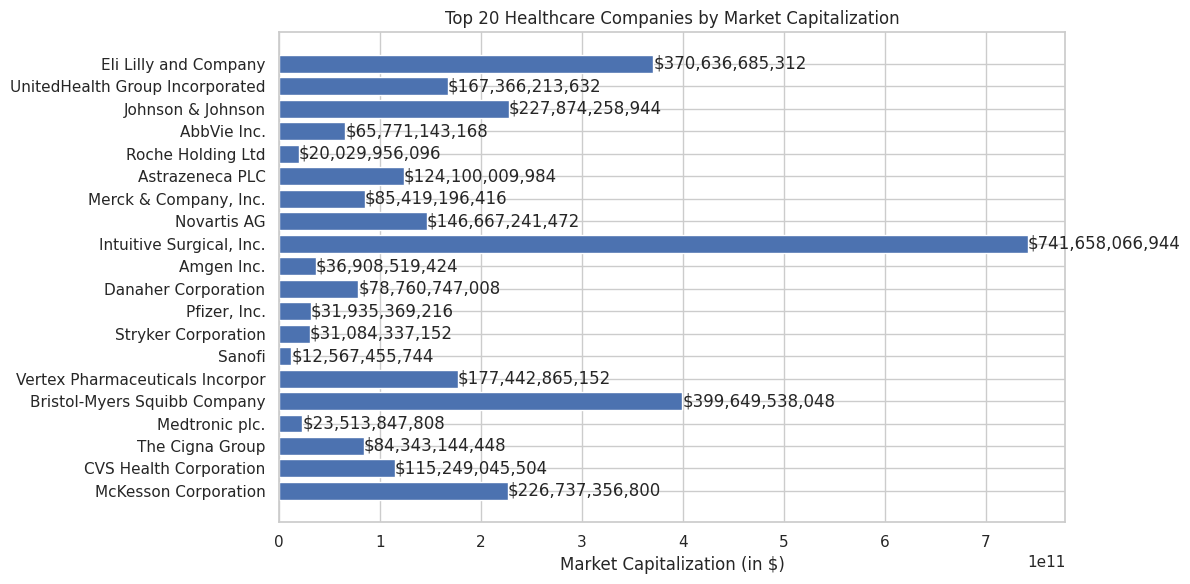

In [22]:
import matplotlib.pyplot as plt

# Sort the data by marketCap and take the top 20 companies
top_companies = financial_data.head(20)

# Convert the marketCap column to a numeric format for plotting
market_caps = top_companies['marketCap'].apply(lambda x: float(x.replace('$', '').replace(',', '')))

# Plot a bar chart for the top 15 companies by market capitalization
plt.figure(figsize=(12, 6))
bars = plt.barh(top_companies['Company'], market_caps)

# Add the market capitalization values on the bars
for index, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f"${market_caps.iloc[index]:,.0f}", va='center')

# Set labels and title
plt.xlabel('Market Capitalization (in $)')
plt.title('Top 20 Healthcare Companies by Market Capitalization')
plt.gca().invert_yaxis()  # Invert the y-axis to show the largest company at the top

# Display the plot
plt.tight_layout()
plt.show()


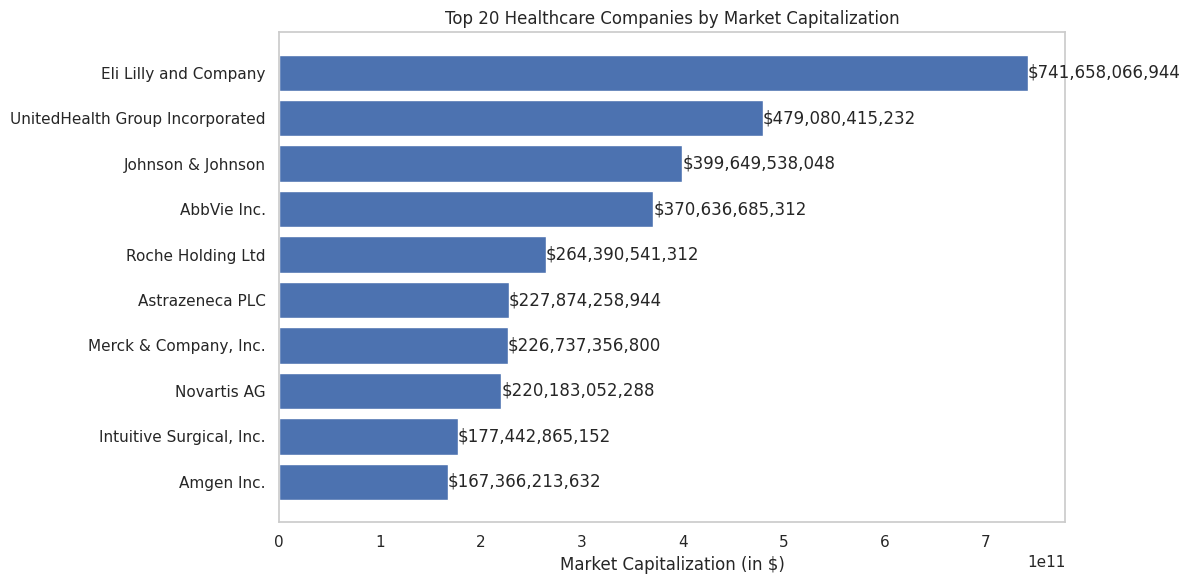

In [26]:
# Convert the marketCap column to numeric for sorting
financial_data['marketCap_numeric'] = financial_data['marketCap'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Sort by marketCap and take the top 20 companies
top_companies = financial_data.sort_values(by='marketCap_numeric', ascending=False).head(10)

# Use the sorted numeric market caps for plotting
market_caps = top_companies['marketCap_numeric']

# Plot a bar chart for the top 20 companies by market capitalization
plt.figure(figsize=(12, 6))
bars = plt.barh(top_companies['Company'], market_caps)

# Add the market capitalization values on the bars
for index, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f"${market_caps.iloc[index]:,.0f}", va='center')

# Set labels and title
plt.xlabel('Market Capitalization (in $)')
plt.title('Top 20 Healthcare Companies by Market Capitalization')
plt.gca().invert_yaxis()  # Invert the y-axis to show the largest company at the top

# Display the plot
plt.tight_layout()
plt.grid(False)           # <<< Add this to remove the dotted line
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # Drop any rows where fullTimeEmployees is 'N/A' and convert the column to numeric
# employee_data = financial_data[financial_data['fullTimeEmployees'] != 'N/A']
# employee_data['fullTimeEmployees'] = pd.to_numeric(employee_data['fullTimeEmployees'], errors='coerce')

# # Take the top 10 companies with the highest number of employees
# top_employers = employee_data.nlargest(10, 'fullTimeEmployees')

# # Function to display both percentage and number of employees in each pie chart slice
# def pie_label_func(pct, all_values):
#     absolute = int(np.round(pct / 100. * np.sum(all_values)))
#     return f"{pct:.1f}%\n({absolute:,})"

# # Plot a pie chart
# plt.figure(figsize=(9, 9))
# plt.pie(
#     top_employers['fullTimeEmployees'],
#     labels=top_employers['Company'],
#     autopct=lambda pct: pie_label_func(pct, top_employers['fullTimeEmployees']),
#     startangle=140
# )
# plt.title('Distribution of Full-Time Employees in Top 10 Healthcare Companies')
# plt.tight_layout()
# plt.show()


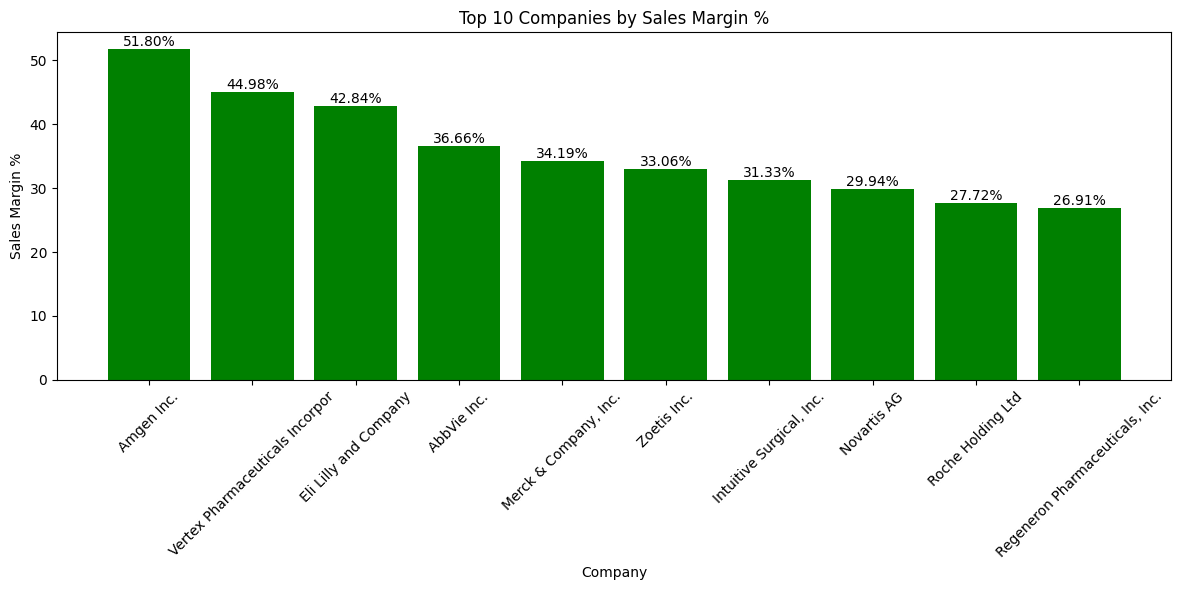

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'N/A' is replaced with NaN and convert sales_margin_% to string type first
financial_data['sales_margin_%'] = financial_data['sales_margin_%'].replace('N/A', np.nan)

# Convert only valid string entries, ignoring NaN, and strip the '%' symbol
financial_data['sales_margin_%'] = financial_data['sales_margin_%'].apply(
    lambda x: str(x).rstrip('%') if isinstance(x, str) else x
).astype('float')

# Take the top 10 companies based on sales margin %
top_sales_margin = financial_data.nlargest(10, 'sales_margin_%')

# Plot a bar chart with expanded x-axis
plt.figure(figsize=(12, 6))  # Expand the width of the figure for better readability
bars = plt.bar(top_sales_margin['Company'], top_sales_margin['sales_margin_%'], color='green')

# Add labels to the bars to show the exact values of sales margin %
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Company')
plt.ylabel('Sales Margin %')
plt.title('Top 10 Companies by Sales Margin %')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent labels from being cut off
plt.show()


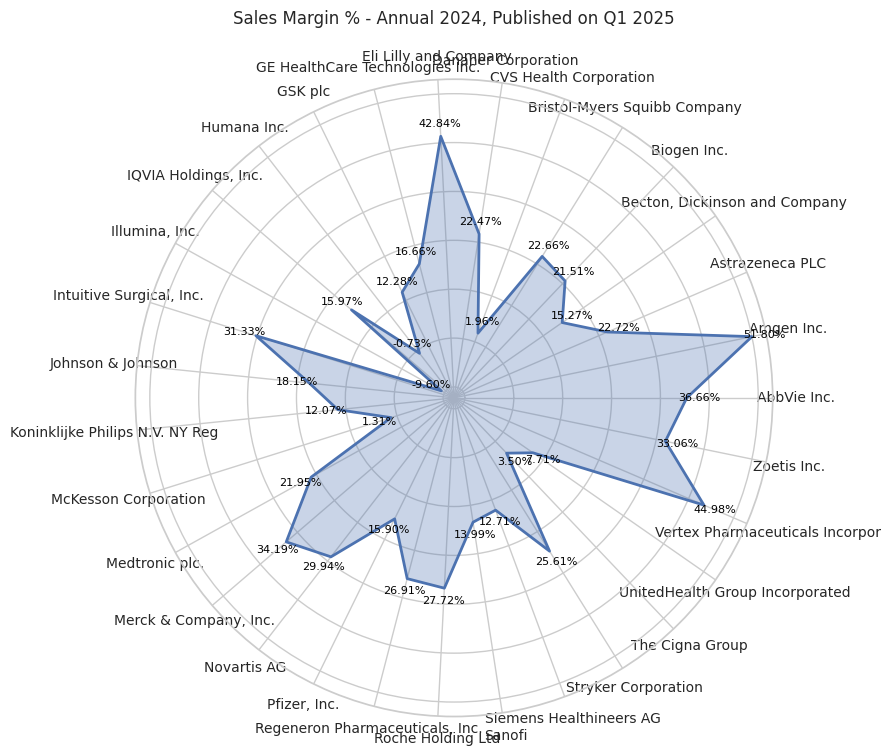

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame `financial_data` with a 'Company' and 'sales_margin_%' columns.

# Step 1: Extract only the necessary columns
df = financial_data[['Company', 'sales_margin_%']].copy()

# Step 2: Replace 'N/A' with NaN and then fill NaN with 0
# df['sales_margin_%'] = df['sales_margin_%'].replace('N/A', np.nan).str.replace('%', '')
df['sales_margin_%'] = pd.to_numeric(df['sales_margin_%'], errors='coerce').fillna(0)

# Step 3: Normalize the Sales Margin % for the radar chart
max_sales_margin = df['sales_margin_%'].max()
df['normalized_sales_margin'] = df['sales_margin_%'] / max_sales_margin

# Step 4: Prepare data for radar chart
labels = df['Company'].tolist()  # List of companies for the radar chart
num_vars = len(labels)

# Define the angle of each axis in the plot (equal distribution of angles)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "close the plot" by appending the first element to the end
values = df['normalized_sales_margin'].tolist()
values += values[:1]
angles += angles[:1]

# Step 5: Plot the radar chart
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

# Plot the normalized sales margin for each company
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Sales Margin % (Normalized)')
ax.fill(angles, values, alpha=0.3)

# Set the category labels
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])  # Skip the last angle for labels
ax.set_xticklabels(labels, fontsize=10, rotation=45)

# Add annotations for each sales margin percentage
for i, (angle, value, margin) in enumerate(zip(angles, values, df['sales_margin_%'].tolist())):
    # Adjust position for label slightly away from the plotted point
    ax.text(angle, value + 0.05, f"{margin:.2f}%", ha='center', va='center', fontsize=8, color='black')

# Add a title
plt.title("Sales Margin % - Annual 2024, Published on Q1 2025", pad=40)

# Show the plot
plt.tight_layout()
plt.show()


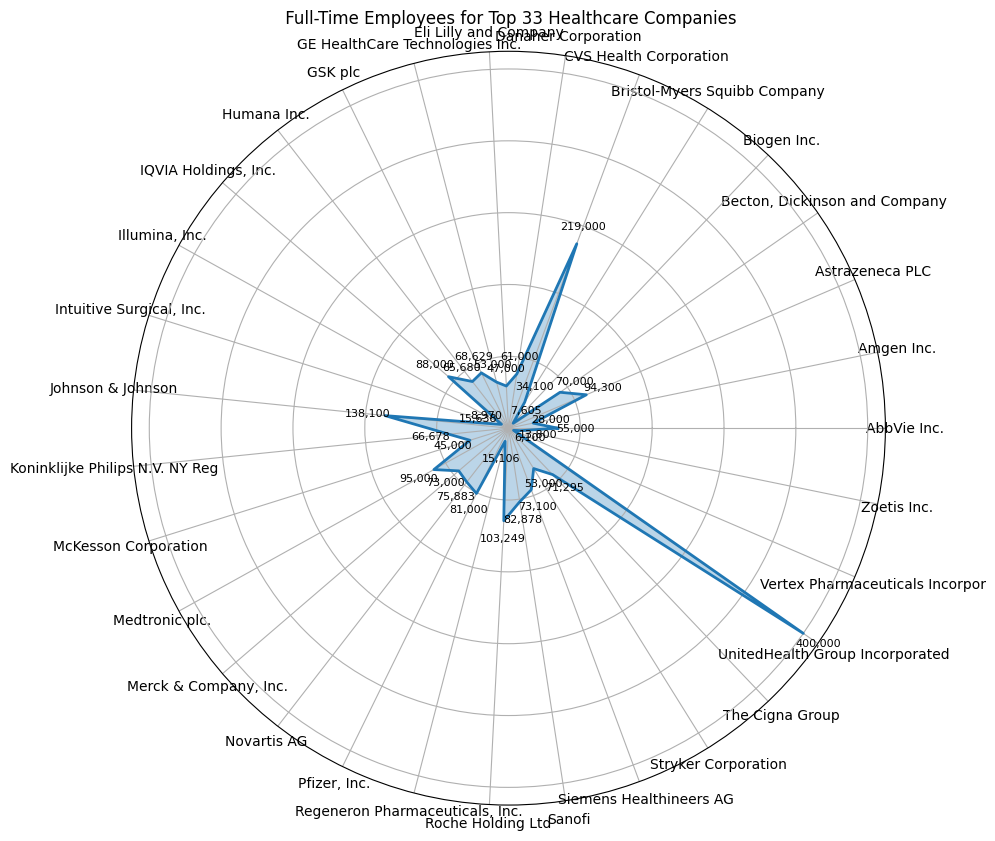

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame `financial_data` with 'Company' and 'fullTimeEmployees' columns.

# Step 1: Extract only the necessary columns
df = financial_data[['Company', 'fullTimeEmployees']].copy()

# Step 2: Replace 'N/A' with NaN and then fill NaN with 0
df['fullTimeEmployees'] = pd.to_numeric(df['fullTimeEmployees'], errors='coerce').fillna(0)

# Step 3: Normalize the full-time employees for the radar chart
max_employees = df['fullTimeEmployees'].max()
df['normalized_employees'] = df['fullTimeEmployees'] / max_employees

# Step 4: Prepare data for radar chart
labels = df['Company'].tolist()  # List of companies for the radar chart
num_vars = len(labels)

# Define the angle of each axis in the plot (equal distribution of angles)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "close the plot" by appending the first element to the end
values = df['normalized_employees'].tolist()
values += values[:1]
angles += angles[:1]

# Step 5: Plot the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot the normalized full-time employees for each company
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Full-Time Employees (Normalized)')
ax.fill(angles, values, alpha=0.3)

# Set the category labels
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])  # Skip the last angle for labels
ax.set_xticklabels(labels, fontsize=10, rotation=45)

# Add annotations for each full-time employee count
for i, (angle, value, employee_count) in enumerate(zip(angles, values, df['fullTimeEmployees'].tolist())):
    # Adjust position for label slightly away from the plotted point
    ax.text(angle, value + 0.05, f"{int(employee_count):,}", ha='center', va='center', fontsize=8, color='black')

# Add a title
plt.title(" Full-Time Employees for Top 33 Healthcare Companies", pad=20)

# Show the plot
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

# Check if 'marketCap' column is not already numeric, and convert if necessary
if financial_data['marketCap'].dtype != 'float64' and financial_data['marketCap'].dtype != 'int64':
    # Remove any non-numeric characters if needed
    financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'].str.replace('[\$,]', '', regex=True), errors='coerce')
else:
    financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'], errors='coerce')

# Similarly, ensure 'fullTimeEmployees' is numeric
financial_data['fullTimeEmployees'] = pd.to_numeric(financial_data['fullTimeEmployees'], errors='coerce')

# Drop rows with missing values in 'marketCap' or 'fullTimeEmployees' for accuracy in sums
financial_data = financial_data.dropna(subset=['marketCap', 'fullTimeEmployees'])

# Group by industry and calculate the total market cap and headcount per industry
industry_summary = financial_data.groupby('industry').agg(
    total_market_cap=pd.NamedAgg(column='marketCap', aggfunc='sum'),
    total_headcount=pd.NamedAgg(column='fullTimeEmployees', aggfunc='sum')
).reset_index()

# Calculate overall totals
total_market_cap = industry_summary['total_market_cap'].sum()
total_headcount = industry_summary['total_headcount'].sum()

# Add percentage splits for market cap and headcount for each industry
industry_summary['market_cap_%'] = (industry_summary['total_market_cap'] / total_market_cap) * 100
industry_summary['headcount_%'] = (industry_summary['total_headcount'] / total_headcount) * 100

# Sort by 'total_market_cap' in descending order
industry_summary = industry_summary.sort_values(by='total_market_cap', ascending=False)

# Format 'total_market_cap' as currency (e.g., "$100B") and 'total_headcount' with commas
industry_summary['total_market_cap'] = industry_summary['total_market_cap'].apply(lambda x: f"${x / 1e9:,.2f}B")
industry_summary['total_headcount'] = industry_summary['total_headcount'].apply(lambda x: f"{x:,.0f}")

# Add overall totals as the last row
overall_totals = pd.DataFrame({
    'industry': ['Total'],
    'total_market_cap': [f"${total_market_cap / 1e9:,.2f}B"],
    'total_headcount': [f"{total_headcount:,.0f}"],
    'market_cap_%': [100.0],
    'headcount_%': [100.0]
})

# Append overall totals to the summary DataFrame
industry_summary = pd.concat([industry_summary, overall_totals], ignore_index=True)

# Display the result
pd.options.display.float_format = '{:,.2f}'.format
display(industry_summary)

,industry,total_market_cap,total_headcount,market_cap_%,headcount_%
0,Drug Manufacturers - General,"$3,120.87B","888,744",62.79,38.49
1,Healthcare Plans,$685.63B,"755,975",13.80,32.74
2,Medical Devices,$341.20B,"287,778",6.87,12.46
3,Medical Instruments & Supplies,$243.21B,"85,638",4.89,3.71
4,Biotechnology,$193.83B,"21,206",3.90,0.92
5,Diagnostics & Research,$190.32B,"157,970",3.83,6.84
6,Medical Distribution,$84.34B,"45,000",1.70,1.95
7,Drug Manufacturers - Specialty & Generic,$73.73B,"13,800",1.48,0.60
8,Health Information Services,$36.91B,"53,000",0.74,2.30
9,Total,"$4,970.05B","2,309,111",100.00,100.00


<ipython-input-8-e32309b9c362>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='YoY Revenue Growth Rate (%)', y='Company Name', palette="viridis")


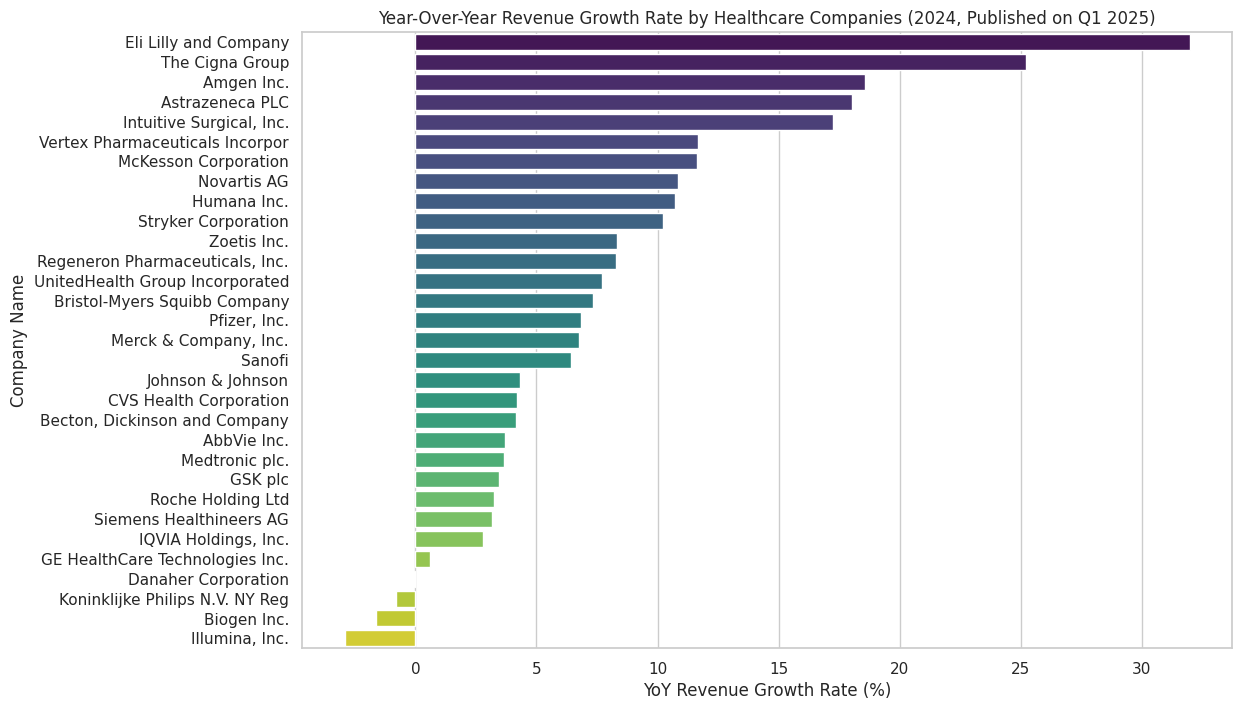

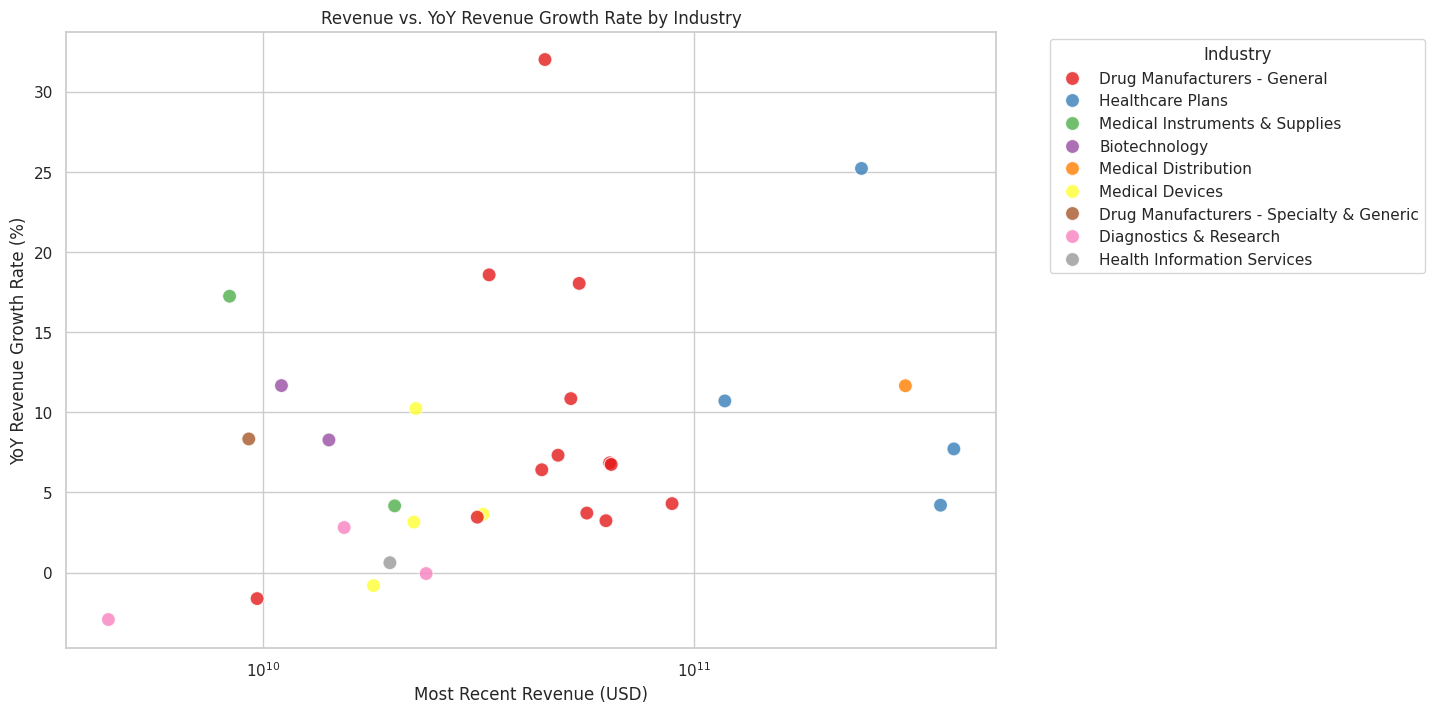

<ipython-input-8-e32309b9c362>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='YoY Revenue Growth Rate (%)', y='Industry', palette="coolwarm")


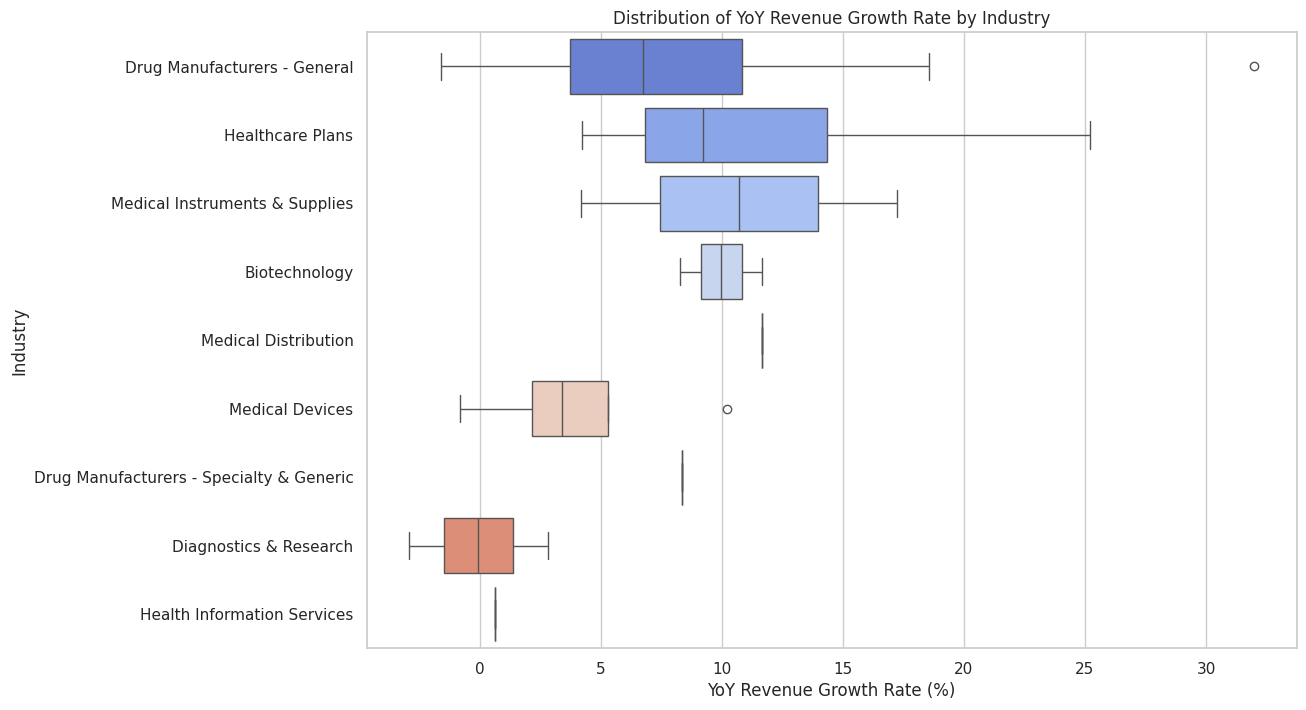

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up seaborn style for advanced visualization
sns.set(style="whitegrid")

# Sample data preparation (use the data prepared in the previous steps)
companies = [
    'JNJ', 'PFE', 'RHHBY', 'NVS', 'MRK', 'UNH', 'ABBV', 'BMY', 'LLY', 'MDT',
    'GSK', 'AZN', 'AMGN', 'SNY', 'DHR', 'CI', 'ISRG', 'SYK', 'CVS', 'BDX',
    'REGN', 'VRTX', 'ILMN', 'ZTS', 'BIIB', 'HUM', 'IQV', 'MCK',
    'GEHC',   # GE Healthcare
    'SMMNY',  # Siemens Healthineers
    'PHG'     # Philips
]

# Initialize a list to store data
data = []

for ticker in companies:
    try:
        stock = yf.Ticker(ticker)
        # Fetch company info for name and industry
        company_info = stock.info
        company_name = company_info.get("shortName", "N/A")
        industry = company_info.get("industry", "N/A")

        # Fetch annual financial data as a DataFrame
        annual_financials = stock.financials

        # Get Revenue for the last two years and the corresponding years
        recent_revenue = annual_financials.loc['Total Revenue'][:2]
        recent_years = recent_revenue.index[:2]

        # Calculate Revenue Growth Rate if there are at least two years of data
        if len(recent_revenue) >= 2:
            revenue_growth_rate = ((recent_revenue.iloc[0] - recent_revenue.iloc[1]) / recent_revenue.iloc[1]) * 100
        else:
            revenue_growth_rate = None

        # Append to data list
        data.append({
            'Ticker': ticker,
            'Company Name': company_name,
            'Industry': industry,
            'Most Recent Revenue': recent_revenue.iloc[0] if len(recent_revenue) > 0 else None,
            'Previous Year Revenue': recent_revenue.iloc[1] if len(recent_revenue) > 1 else None,
            'YoY Revenue Growth Rate (%)': revenue_growth_rate
        })

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert data to DataFrame
df = pd.DataFrame(data)

# Drop rows with missing growth rates for visualizations
df = df.dropna(subset=['YoY Revenue Growth Rate (%)'])

# Sort by 'YoY Revenue Growth Rate (%)' in descending order
df = df.sort_values(by='YoY Revenue Growth Rate (%)', ascending=False)

### Visualization 1: Bar Chart of YoY Revenue Growth Rate
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='YoY Revenue Growth Rate (%)', y='Company Name', palette="viridis")
plt.title('Year-Over-Year Revenue Growth Rate by Healthcare Companies (2024, Published on Q1 2025)')
plt.xlabel('YoY Revenue Growth Rate (%)')
plt.ylabel('Company Name')
plt.show()

### Visualization 2: Scatter Plot of Revenue vs. YoY Growth Rate
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Most Recent Revenue', y='YoY Revenue Growth Rate (%)', hue='Industry', palette="Set1", s=100, edgecolor="w", alpha=0.8)
plt.title('Revenue vs. YoY Revenue Growth Rate by Industry')
plt.xlabel('Most Recent Revenue (USD)')
plt.ylabel('YoY Revenue Growth Rate (%)')
plt.xscale('log')  # Log scale to manage large revenue range
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Visualization 3: Box Plot of YoY Revenue Growth by Industry
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='YoY Revenue Growth Rate (%)', y='Industry', palette="coolwarm")
plt.title('Distribution of YoY Revenue Growth Rate by Industry')
plt.xlabel('YoY Revenue Growth Rate (%)')
plt.ylabel('Industry')
plt.show()